# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the dataset**

In [2]:
df = pd.read_csv("Crowd data for anomaly detection.csv")
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# **Exploratory Data Analysis(EDA)**

### **Info about dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


### **Total no of rows**

In [4]:
print("Total no.of rows: " + str(len(df)))

Total no.of rows: 24123


### **Total size of dataset**

In [5]:
print("Total size of dataset : " + str(df.size))

Total size of dataset : 289476


### **Finding the rows with null values(if any)**

In [6]:
print("Total no of with null values present in: ")
df.isnull().sum()

Total no of with null values present in: 


timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

### **Checking if the Null values are truly null**

In [7]:
df[df["Acc"].isnull()]

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
1204,0:25:40,0.3501,19.3737,0.6339,89.0087,204,2.04,NaN,3,0,normal,0
1295,0:27:11,0.2859,19.2782,0.5088,89.8257,271,2.71,NaN,3,0,normal,0
1409,0:29:05,0.2889,19.8222,0.4984,90.2284,335,3.35,NaN,3,0,normal,0
1548,0:31:24,0.2560,18.9199,0.3872,87.3564,414,4.14,NaN,4,1,anomaly,2
2051,0:39:47,0.2313,17.7160,0.3583,86.4112,554,5.54,NaN,5,1,anomaly,2
...,...,...,...,...,...,...,...,...,...,...,...,...
23238,0:44:30,0.2741,19.4997,0.6526,89.0662,319,3.19,NaN,3,0,normal,0
23367,0:46:39,0.3193,20.6987,0.9704,89.4789,195,1.95,NaN,2,0,normal,0
23414,0:47:26,0.3302,20.4417,1.1205,89.4718,139,1.39,NaN,1,0,normal,0
23493,0:48:45,0.3279,20.5536,1.1321,89.3395,141,1.41,NaN,1,0,normal,0


## **Data Cleaning**

### **Removing cells with null values in acc**

In [8]:
remove_null = pd.notnull(df["Acc"])
df = df[remove_null]

### **Checking whether all null values are removed or not**

In [9]:
df.isnull().sum()

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64

### **Actual no of rows with all values present**

In [10]:
len(df)

24019

### **Checking for no. of normal labels**

In [11]:
print("The no.of normal labelled rows are: " + str(len(df[(df["label2"].str.contains("normal")) & (df["label"] == 0)])))

The no.of normal labelled rows are: 17069


### **Checking for no. of anamoly labels**

In [12]:
print("The no.of anomaly labelled rows are: " + str(len(df[(df["label2"].str.contains("anomaly")) & (df["label"] == 1)])))

The no.of anomaly labelled rows are: 6950


### **Statistical Insights on dataset**

In [13]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000,24019.000000
mean,0.319808,19.990160,0.742707,90.316299,251.172655,2.511727,0.004203,2.337899,0.289354,0.510055
std,0.067306,1.202142,0.279287,4.809246,167.758391,1.677584,0.032528,1.456986,0.453472,0.857736
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264400,19.575300,0.496300,88.474500,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288400,0.784100,89.170100,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798700,337.000000,3.370000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


## **Graph Plotting**

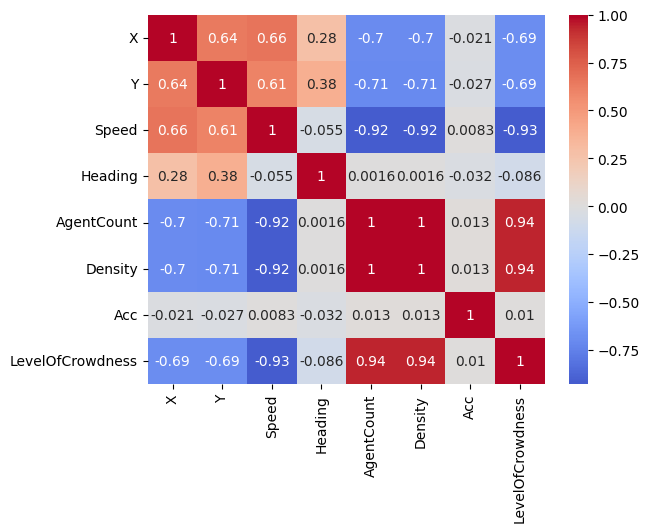

In [14]:
corr_matrix = df.iloc[:,1:9].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

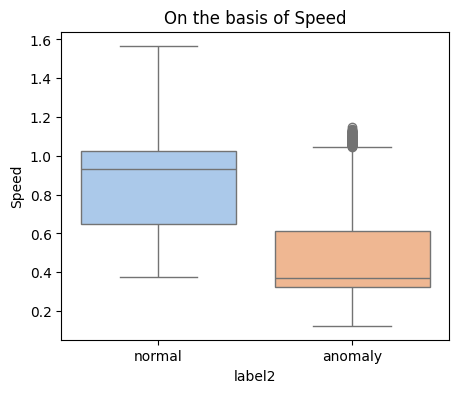

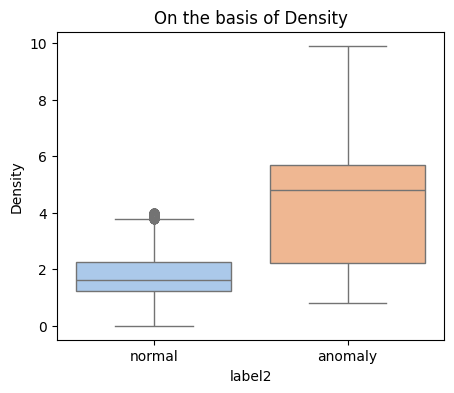

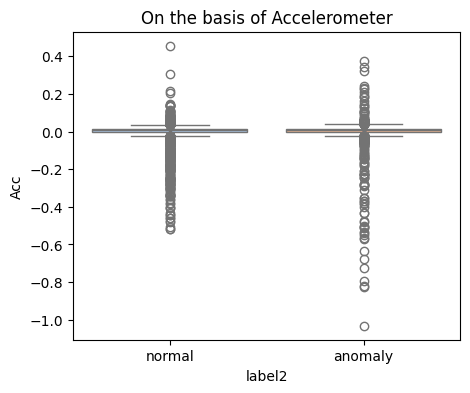

In [15]:
plt.figure(figsize=(5, 4))
plt.title("On the basis of Speed")
sns.boxplot(x= df["label2"], y= df["Speed"], data=df, palette='pastel',hue = df["label2"])
plt.show()
plt.figure(figsize=(5, 4))
plt.title("On the basis of Density")
sns.boxplot(x= df["label2"], y= df["Density"], data=df, palette='pastel',hue = df["label2"])
plt.show()
plt.figure(figsize=(5, 4))
plt.title("On the basis of Accelerometer")
sns.boxplot(x= df["label2"], y= df["Acc"], data=df, palette='pastel',hue = df["label2"])
plt.show()

In [16]:
def color_code(label2):
    if label2 == "normal":
        return "blue"
    else:
        return "red"
colors = df["label2"].map(color_code)

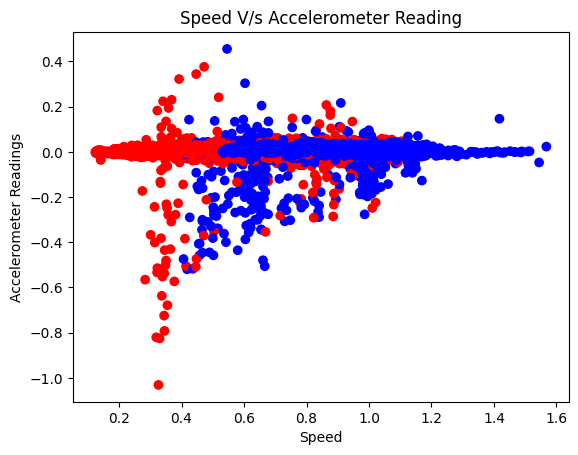

In [17]:
plt.title("Speed V/s Accelerometer Reading")
plt.xlabel("Speed")
plt.ylabel("Accelerometer Readings")
plt.scatter(df["Speed"],df["Acc"],color = colors)

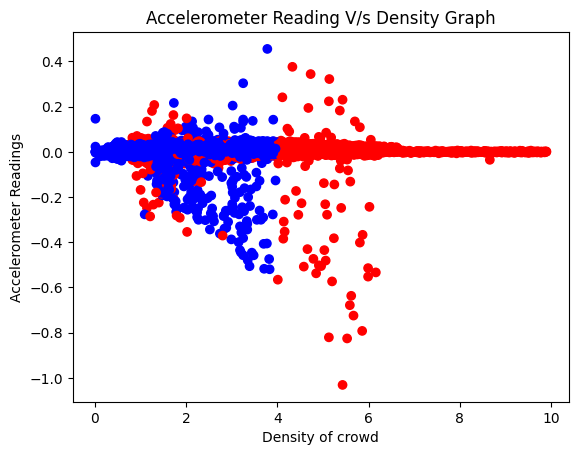

In [18]:
plt.title("Accelerometer Reading V/s Density Graph")
plt.scatter(df["Density"],df["Acc"],color = colors)
plt.xlabel("Density of crowd")
plt.ylabel("Accelerometer Readings")
plt.show()

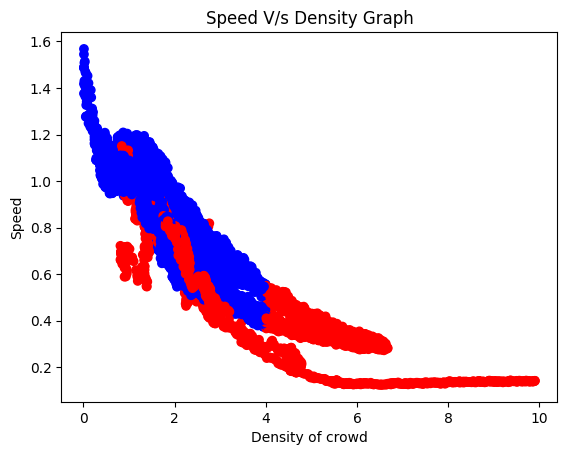

In [19]:
plt.title("Speed V/s Density Graph")
plt.scatter(df["Density"],df["Speed"],color = colors)
plt.xlabel("Density of crowd")
plt.ylabel("Speed")
plt.show()

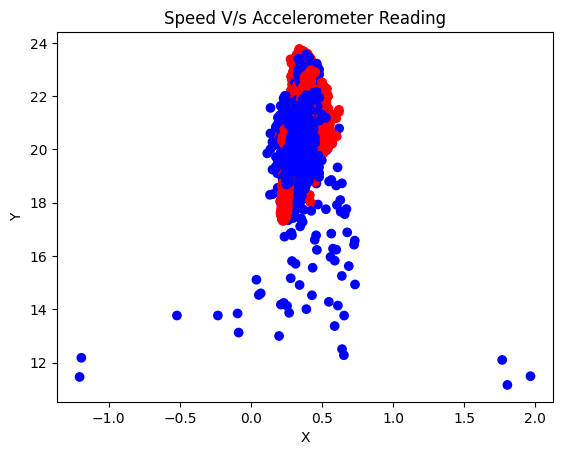

In [23]:
plt.title("Speed V/s Accelerometer Reading")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(df["X"],df["Y"],color = colors)

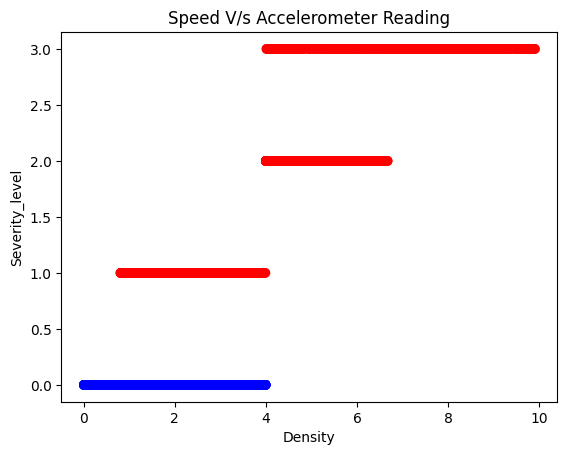

In [24]:
plt.title("Speed V/s Accelerometer Reading")
plt.ylabel("Severity_level")
plt.xlabel("Density")
plt.scatter(df["Density"],df["Severity_level"],color = colors)

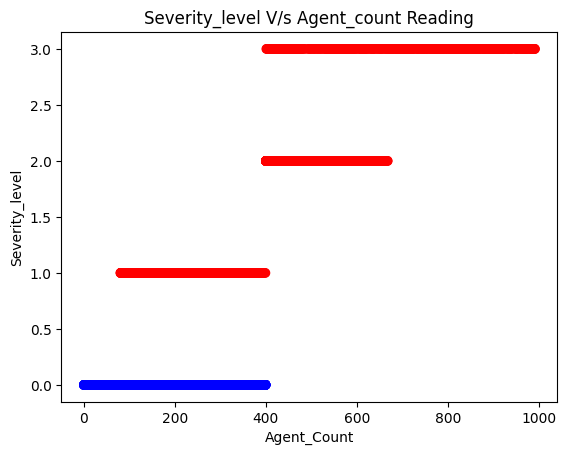

In [25]:
plt.title("Severity_level V/s Agent_count Reading")
plt.ylabel("Severity_level")
plt.xlabel("Agent_Count")
plt.scatter(df["AgentCount"],df["Severity_level"],color = colors)

<BarContainer object of 24019 artists>

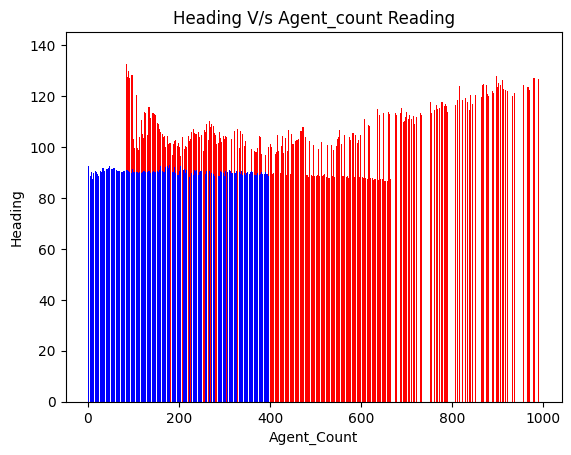

In [26]:
plt.title("Heading V/s Agent_count Reading")
plt.ylabel("Heading")
plt.xlabel("Agent_Count")
plt.bar(df["AgentCount"],df["Heading"],color = colors)

<BarContainer object of 24019 artists>

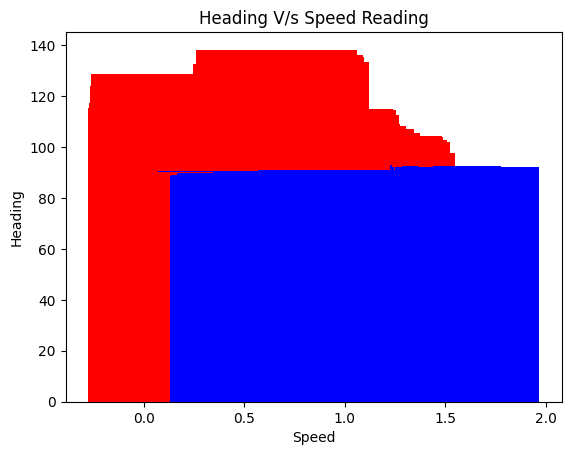

In [27]:
plt.title("Heading V/s Speed Reading")
plt.ylabel("Heading")
plt.xlabel("Speed")
plt.bar(df["Speed"],df["Heading"],color = colors)

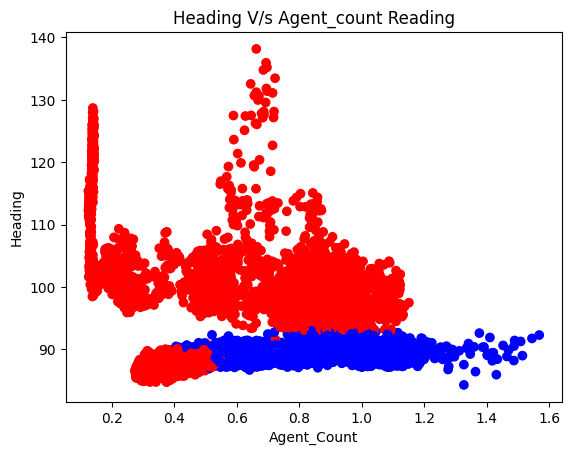

In [28]:
plt.title("Heading V/s Agent_count Reading")
plt.ylabel("Heading")
plt.xlabel("Agent_Count")
plt.scatter(df["Speed"],df["Heading"],color = colors)

<BarContainer object of 24019 artists>

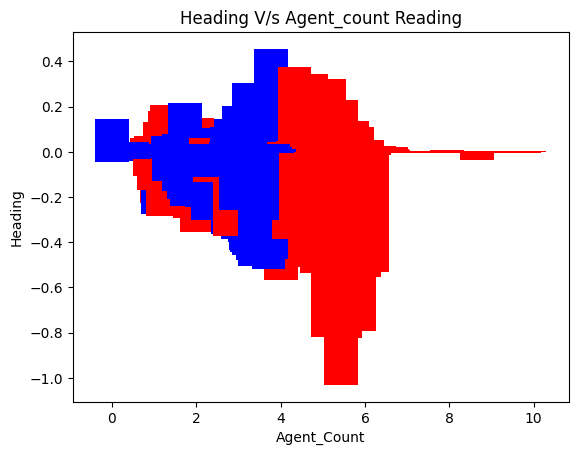

In [29]:
plt.title("Heading V/s Agent_count Reading")
plt.ylabel("Heading")
plt.xlabel("Agent_Count")
plt.bar(df["Density"],df["Acc"],color = colors)

Text(0.5, 0.92, '3D Scatter Plot')

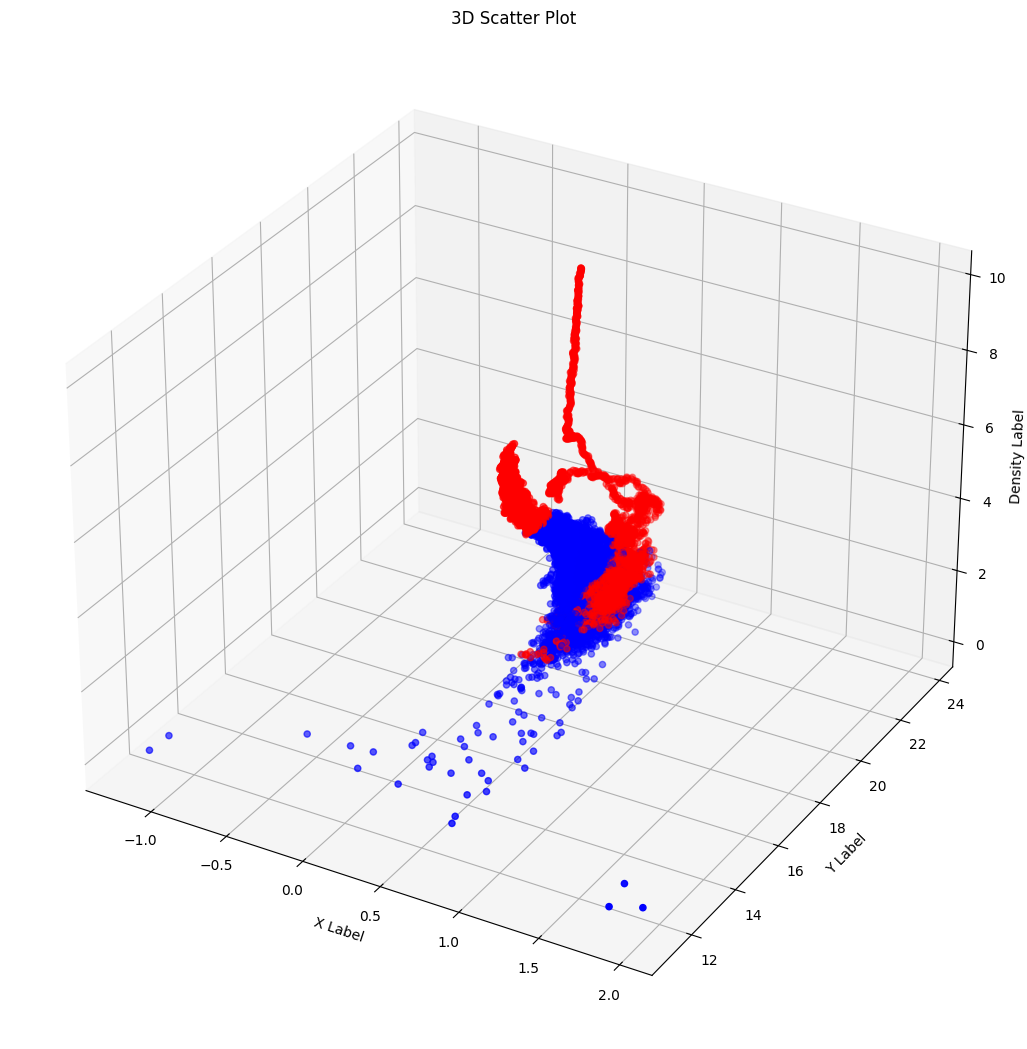

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 18))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['X'], df['Y'], df['Density'], c=colors, marker='o')

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Density Label')
ax.set_title('3D Scatter Plot')

Text(0.5, 0.92, '3D Scatter Plot')

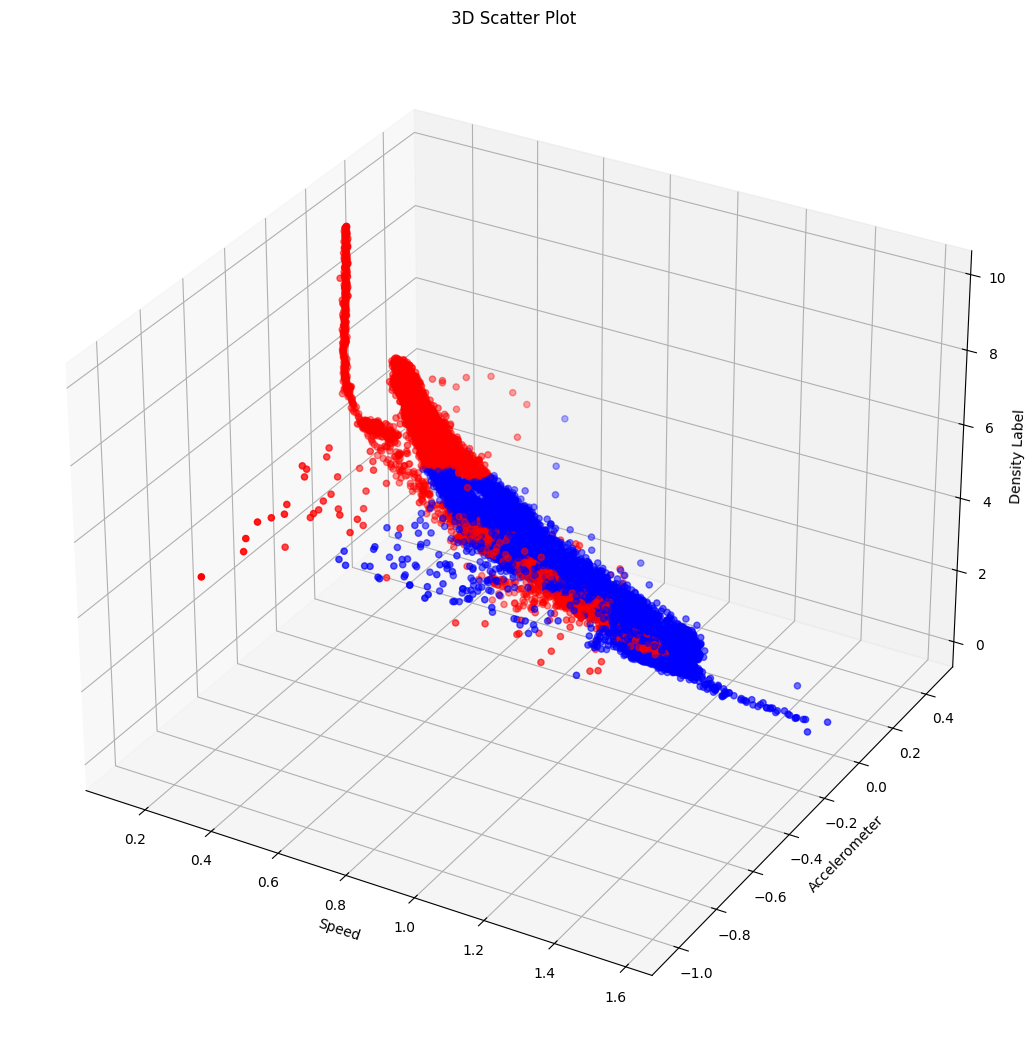

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 18))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Speed'], df['Acc'], df['Density'], c=colors, marker='o')

# Labels and title
ax.set_xlabel('Speed')
ax.set_ylabel('Accelerometer')
ax.set_zlabel('Density Label')
ax.set_title('3D Scatter Plot')

In [32]:
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# **Data preprocessing**

In [33]:
required_labels = ["timestamp", "X", "Y","Speed","Heading","Density","Acc","label","Severity_level"]
df_actual = df[required_labels]
df_actual.head()
len(df_actual)

24019

### **Checking for skewness before IQR and z-score**

In [34]:
df_actual["Speed"].skew()

-0.2628078003684616

In [35]:
df_actual["Density"].skew()

1.1026598594387964

In [36]:
df_actual["Acc"].skew()

-10.752610696487517

In [37]:
df_actual["Heading"].skew()

3.8231933492276164

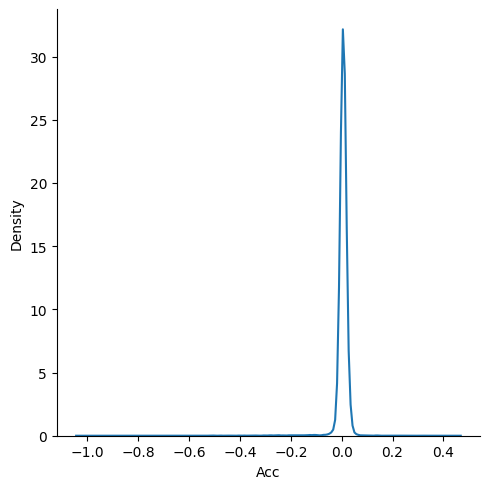

In [38]:
sns.displot(df_actual["Acc"],kind="kde")

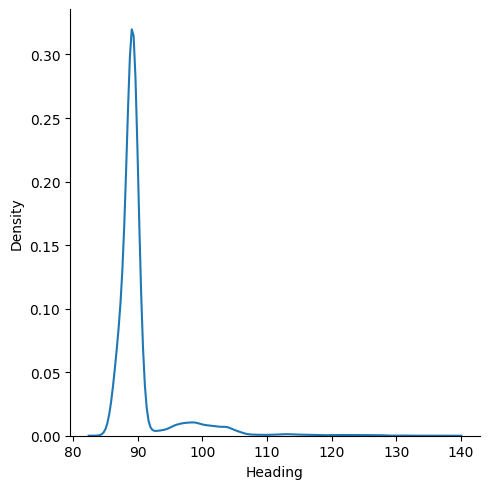

In [39]:
sns.displot(df_actual["Heading"],kind="kde")

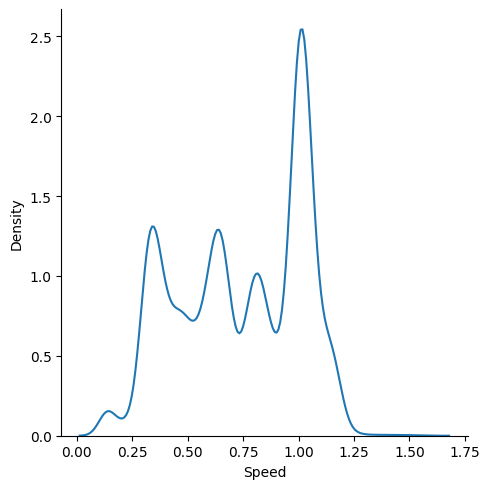

In [40]:
sns.displot(df_actual["Speed"],kind="kde")

**Insights:** So, Acc column outliers has to be found using Z-score and for speed,density and Heading we will use Iqr as these are skewed graph abd acc is a normally distributed one so z-score.

# **Statistical Modelling**

### **IQR Modelling**

In [41]:
def IQR(n,df_actual):
    percentile25 = df_actual[n].quantile(0.25)
    percentile75 = df_actual[n].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data = {
            'For parameter':n,
            ':Upper limit': upper_limit,
            'Lower limit': lower_limit,
            'Outliers above maximum limit(normal)' : len((df_actual[(df_actual[n]>upper_limit) & (df_actual["label"] == 0)])),
            'Outliers above maximum limit(anomaly)' : len((df_actual[(df_actual[n]>upper_limit) & (df_actual["label"] == 1)])),
            'Outliers  below minimum limit(normal)' : len((df_actual[(df_actual[n]<lower_limit) &  (df_actual["label"] == 0)])),
            'Outliers  below minimum limit(anomaly)' : len((df_actual[(df_actual[n]<lower_limit) &  (df_actual["label"] == 1)]))
    }
    return data

In [42]:
iqr_acc = IQR("Acc",df_actual)##
iqr_acc

{'For parameter': 'Acc',
 ':Upper limit': 0.036849999999999994,
 'Lower limit': -0.024349999999999997,
 'Outliers above maximum limit(normal)': 187,
 'Outliers above maximum limit(anomaly)': 137,
 'Outliers  below minimum limit(normal)': 304,
 'Outliers  below minimum limit(anomaly)': 229}

In [43]:
iqr_speed = IQR("Speed",df_actual)
iqr_speed

{'For parameter': 'Speed',
 ':Upper limit': 1.7703000000000002,
 'Lower limit': -0.26810000000000006,
 'Outliers above maximum limit(normal)': 0,
 'Outliers above maximum limit(anomaly)': 0,
 'Outliers  below minimum limit(normal)': 0,
 'Outliers  below minimum limit(anomaly)': 0}

In [44]:
iqr_heading = IQR("Heading",df_actual)
iqr_heading

{'For parameter': 'Heading',
 ':Upper limit': 91.78499999999998,
 'Lower limit': 86.48820000000002,
 'Outliers above maximum limit(normal)': 94,
 'Outliers above maximum limit(anomaly)': 2714,
 'Outliers  below minimum limit(normal)': 8,
 'Outliers  below minimum limit(anomaly)': 625}

In [45]:
iqr_density = IQR("Density",df_actual)
iqr_density

{'For parameter': 'Density',
 ':Upper limit': 6.415000000000001,
 'Lower limit': -1.7050000000000003,
 'Outliers above maximum limit(normal)': 0,
 'Outliers above maximum limit(anomaly)': 275,
 'Outliers  below minimum limit(normal)': 0,
 'Outliers  below minimum limit(anomaly)': 0}

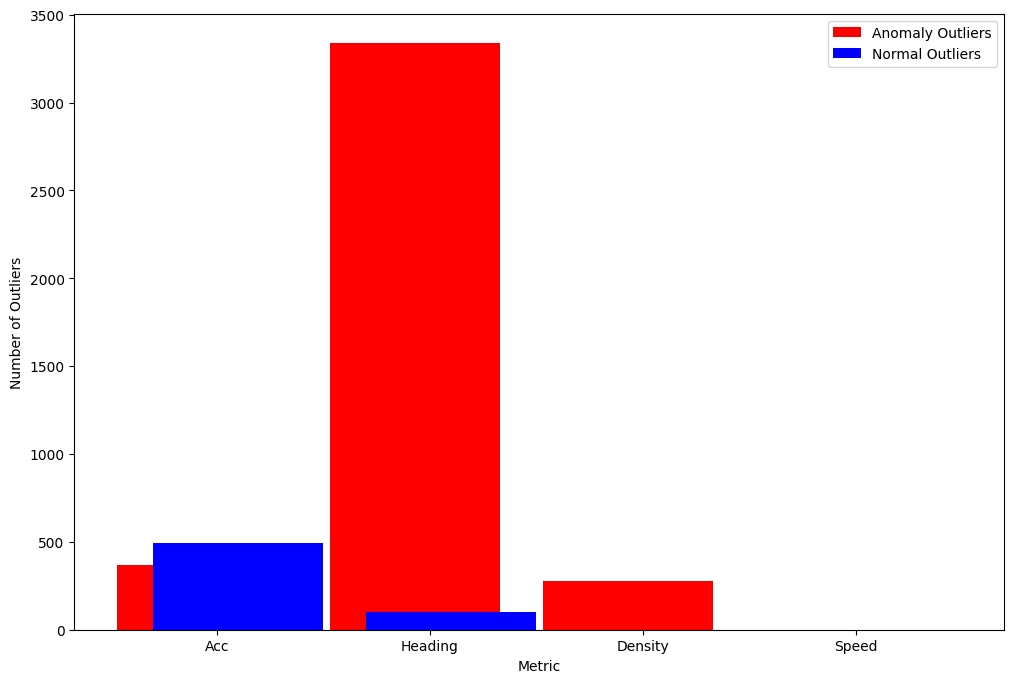

In [46]:
d = [iqr_acc,iqr_heading,iqr_density,iqr_speed]
def visual_display(d):
    metrics =[]
    anomaly_outliers = []
    normal_outliers = []
    for i in d:
        metrics.append(i['For parameter'])
        anomaly_outliers.append(i['Outliers above maximum limit(anomaly)'] + i['Outliers  below minimum limit(anomaly)'])
        normal_outliers.append(i['Outliers above maximum limit(normal)'] + i['Outliers  below minimum limit(normal)'])
    bar_width = 0.7
    index = np.arange(len(metrics))

    fig, ax = plt.subplots(figsize=(12, 8))
    bar1 = ax.bar(index - bar_width / 10 ,anomaly_outliers,color = 'r',label='Anomaly Outliers')
    bar2 = ax.bar(index + bar_width / 7,normal_outliers,color = 'b',label='Normal Outliers')
    ax.set_xlabel('Metric')
    ax.set_ylabel('Number of Outliers')
    ax.set_xticks(index)
    ax.set_xticklabels(metrics)
    ax.legend()

    # plt.tight_layout()
    plt.show()

# Calling the function to visualize the data
visual_display(d)

### **Z-score Modelling**

In [47]:
def Z_score(n,df_actual):
    mean = np.mean(df_actual[n])
    std = np.std(df_actual[n])
    threshold = 3
    outlier_normal = []
    outlier_anomaly = []
    outliers = []
    for i in range (len(df_actual)):
        z = (df_actual.iloc[i][n]-mean)/std
        if z > threshold:
            # outliers.append(df_actual.iloc[i][n])
    # return outliers
            if df_actual.iloc[i]["label"] == 1:
                outlier_anomaly.append(df_actual.iloc[i][n])
            else:
                outlier_normal.append(df_actual.iloc[i][n])
    data ={
        'Metrics' : n ,
        'No of anomalies':len(outlier_anomaly),
        'No. of normal condition':len(outlier_normal)
    }
    return data
    

In [48]:
Z_score("Acc",df_actual)
# len(Z_score("Acc",df_actual))

{'Metrics': 'Acc', 'No of anomalies': 19, 'No. of normal condition': 16}

# **ML Models**

### **Elliptic Envelope**

Accuracy(in %):28.823202886483486


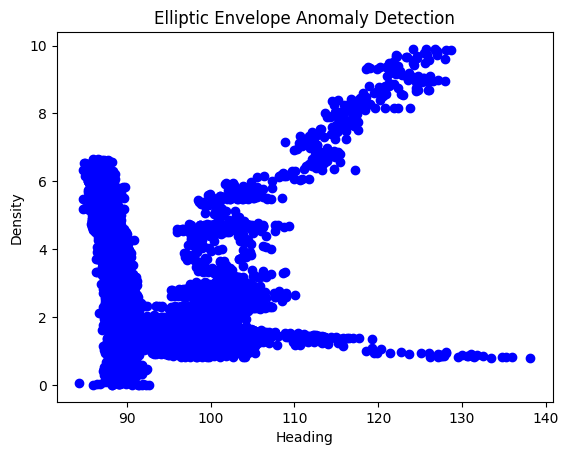

In [59]:
from sklearn.covariance import EllipticEnvelope
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
X_features=["Heading","Density"]
x = df_actual [X_features]
y = df_actual["label"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
elliptic_envelope = EllipticEnvelope(contamination=0.0001)
elliptic_envelope.fit(x_train)
predictions = elliptic_envelope.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predictions,y_test)
print(f"Accuracy(in %):{accuracy * 100}")
def colours(predictions,y_test):
    if predictions == y_test:
        color ='r'
    else:
        color = 'b'
    return color
predictions = np.where(predictions == -1,1,0)
predictions
plt.scatter(x['Heading'], x['Density'], c=colours(predictions.tolist(),y_test.tolist()))
plt.title('Elliptic Envelope Anomaly Detection')
plt.xlabel('Heading')
plt.ylabel('Density')
plt.show()

### **DBSCAN** 

Accuracy(in %):71.25192555893251


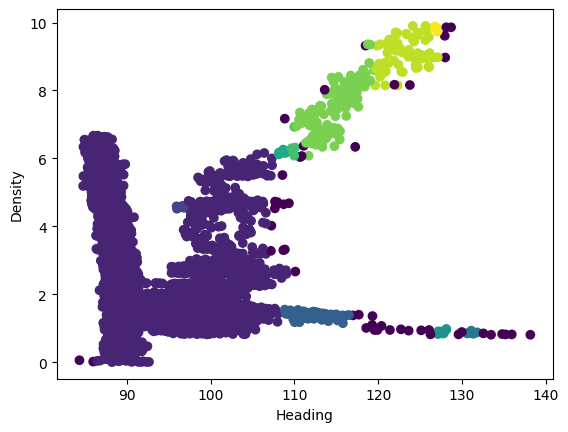

In [62]:
from sklearn.cluster import DBSCAN
dbcan = DBSCAN(eps =0.62)
X_features = ['Heading','Density']
X = df_actual[X_features]
y = dbcan.fit_predict(X)
y_test  = np.where(y == -1, 1, 0)
y = y.tolist()
dbcan.labels_
plt.scatter(X['Heading'],X['Density'], c = dbcan.labels_,cmap='viridis')
plt.xlabel('Heading')
plt.ylabel('Density')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,df['label'].values)
print(f"Accuracy(in %):{accuracy * 100}")

### **Decision Tree**

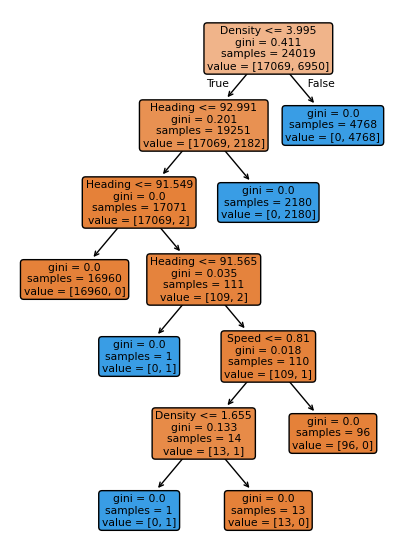

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
features = ["Speed","Heading","Density","Acc"]
X = df[features]
y = df["label"]

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
plt.figure(figsize=(5, 7))
tree.plot_tree(dtree, feature_names=features,rounded=True,filled=True)
plt.show()

### **Isolation Forest**

In [63]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
X_features=["Heading","Density"]
X = df_actual[X_features]
y = df_actual["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# initialize and fit the model
clf = IsolationForest(contamination=0.3,random_state=42)
clf.fit(X_train)

IsolationForest(contamination=0.3, random_state=42)

In [65]:
# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train predictions:", y_pred_train)
print("Test predictions:", y_pred_test)

# Ensure y_test and y_pred_test have the same length
print("Length of y_test:", len(y_test))
print("Length of y_pred_test:", len(y_pred_test))
transformed_array = np.where(y_test.values == 1, -1, 1)
y_test_actual = transformed_array.tolist()
# Print length of y_test_actual
# print("Test predictions:", y_test_actual)
print("Length of y_test_actual:", len(y_test_actual))

Train predictions: [1 1 1 ... 1 1 1]
Test predictions: [-1  1  1 ...  1 -1  1]
Length of y_test: 7206
Length of y_pred_test: 7206
Length of y_test_actual: 7206


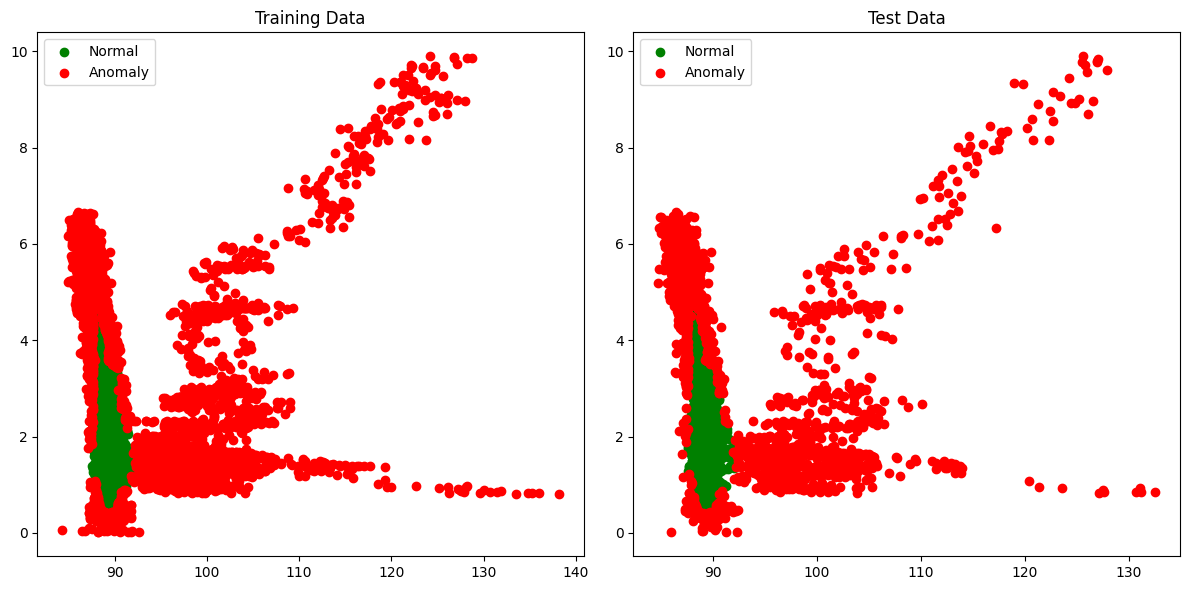

Accuracy(in %): 91.85401054676659


In [66]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1]['Heading'], X1[y1==1]['Density'], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1]['Heading'], X1[y1==-1]['Density'], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1]['Heading'], X2[y2==1]['Density'], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1]['Heading'], X2[y2==-1]['Density'], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()
    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train,'Training Data', X_test, y_pred_test, 'Test Data')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_test,y_test_actual)
print(f"Accuracy(in %): {accuracy*100}")

### **KNN**

#### **KNN with heading only**

In [67]:
from sklearn.model_selection import train_test_split
x = df_actual[["Heading"]]
y = df_actual["label"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

Accuracy(in %): 92.17318900915903


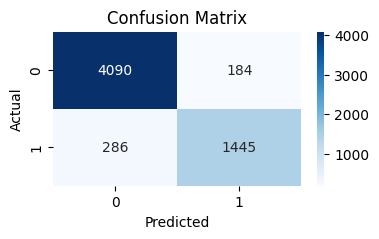

Precision score:  0.8870472682627378
Recall score 0.8347775852108608
F1 score:  0.8601190476190477


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.metrics 
# Initialize the KNN classifier with a specified number of neighbors, e.g., 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(x_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(x_test)

 #Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy(in %): {accuracy*100}")
# print(f"Classification Report:\n{report}")
# Plot Confusion Matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Precision score: ",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall score",sklearn.metrics.recall_score(y_test, y_pred))
print("F1 score: ",sklearn.metrics.f1_score(y_test, y_pred))

#### **KNN with Heading and Density**

In [69]:
from sklearn.model_selection import train_test_split
X_features=["Heading","Density"]
x = df_actual [X_features]
y = df_actual["label"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

Accuracy(in %): 99.86677768526229


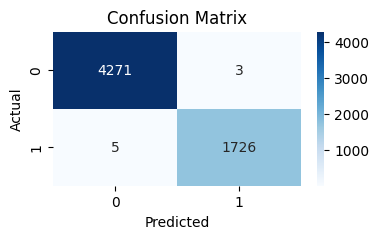

Precision score:  0.9982648930017352
Recall score 0.9971114962449451
F1 score:  0.9976878612716763


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the KNN classifier with a specified number of neighbors, e.g., 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(x_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(x_test)

 #Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy(in %): {accuracy*100}")
# print(f"Classification Report:\n{report}")
# Plot Confusion Matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Precision score: ",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall score",sklearn.metrics.recall_score(y_test, y_pred))
print("F1 score: ",sklearn.metrics.f1_score(y_test, y_pred))

**Insights**:The kNN with heading can be considered proper fitting but KNN with heading and density is Overfitting as accuracy score is much higher.

### **Local Outlier Factor**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# Features
X = df_actual[['Heading', 'Density']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=7, contamination=0.012)
# Fit the model and predict outliers
df_actual['Predicted'] = lof.fit_predict(X_scaled)

df_actual['Predicted'] = df_actual['Predicted'].apply(lambda x: 1 if x == -1 else 0)
    
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_actual['label'],df_actual['Predicted'])
print(f"Accuracy(in %):{accuracy * 100}")
def colours(label,Predicted):
    return 'y' if label == Predicted else 'b'
colors = df_actual.apply(lambda row: colours(row['label'], row['Predicted']), axis=1)
# Plotting
plt.scatter(df_actual['Heading'], df_actual['Density'], color=colors)
plt.xlabel('Heading')
plt.ylabel('Density')
plt.title('Outlier Detection Visualization')
plt.show()
